<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **단변량 분석 ② - 범주형**

- 범주형 변수는 정해진 몇 개의 값이 여럿 모여있는 변수입니다.
- 예를 들어 Titanic 데이터의 Pclass 변수는 객실 등급 1, 2, 3이 범줏값으로 포함되어 있습니다.
- 이런 범주형 변수는 범줏값 각각이 몇 개씩 포함되어 있는지, 전체에서 각각이 차지하는 비율은 어떤지가 궁금합니다.
- 즉 범주형 변수안에 포함된 범숫값 각각의 **빈도수**와 **비율**이 분석 대상이 됩니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/var_02.png' width=600 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 불러옵니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Titanic 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.1.csv'
titanic = pd.read_csv(path)
titanic.head()

,Survived,Pclass,Title,Sex,Age,Fare,Embarked,AgeGroup,Family,Mother
0,0,3,Mr,male,22.0,7.2500,S,Age_20,2,0
1,1,1,Mrs,female,38.0,71.2833,C,Age_30,2,0
2,1,3,Miss,female,26.0,7.9250,S,Age_20,1,0
3,1,1,Mrs,female,35.0,53.1000,S,Age_30,2,0
4,0,3,Mr,male,35.0,8.0500,S,Age_30,1,0


**📋 데이터 정보**

- Survived: 생존 여부(1:생존, 0:사망)
- Pclass: 객실 등급(1:1등급, 2:2등급, 3:3등급)
- Title: 호칭(Mr, Mrs, Miss, Master, Others)
- Sex: 성별(male, female)
- Age: 나이
- Fare: 운임($)
- Embarked: 승선 지역(S:Southampton, C:Cherbourg, Q:Queenstown)
  - 사우샘프턴(영국), 셰르부르(프랑스), 퀸스타운(아일랜드)
- AgeGroup: 연령대
- Family: 같이 탑승한 가족 수
- Mother: 엄마 여부

## **2. 수치화**

- 범주형 변수는 범주별 빈도수와 비율을 기초 통계량을 통해 확인합니다.
- Pandas의 **value_counts()** 메소드는 범주형 변수에 포함된 범줏값 각각의 개수를 카운트 해 줍니다.
- **normalize=True** 옵션을 지정해 개수가 아닌 비율을 확인할 수 있습니다.

In [3]:
print(titanic['Pclass'].value_counts())
print('-' * 28)
print(titanic['Pclass'].value_counts(normalize=True))

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
----------------------------
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


- 범주값만 확일할 때는 unique() 메서드를 사용

In [14]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

- 함수를 사용해 정렬된 결과를 표시할 수 있다.

In [17]:
sorted(titanic['Pclass'].unique())

[1, 2, 3]

**🔍 해석**
    
- 3등급 객실 탑승객이 전체에서 55%를 차지합니다.
- 1등급 객실 탑승객이 24%, 2등급 객실 탑승객이 20.7%를 차지합니다.



In [4]:
print(titanic['Embarked'].value_counts())
print('-' * 28)
print(titanic['Embarked'].value_counts(normalize=True))

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----------------------------
Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64


In [5]:
print(titanic['Survived'].value_counts())
print('-' * 28)
print(titanic['Survived'].value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64
----------------------------
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

다음 변수들의 빈도수와 비율을 확인하세요.

**1️⃣ Title**

In [18]:
print(titanic['Title'].value_counts())
print('-'*28)
print(titanic['Title'].value_counts(normalize=True))

Title
Mr        523
Miss      185
Mrs       128
Master     41
Others     14
Name: count, dtype: int64
----------------------------
Title
Mr        0.586981
Miss      0.207632
Mrs       0.143659
Master    0.046016
Others    0.015713
Name: proportion, dtype: float64


In [24]:
# Series -> 데이터프레임
pd.DataFrame(titanic['Title'].value_counts(normalize=True))

,proportion
Title,
Mr,0.586981
Miss,0.207632
Mrs,0.143659
Master,0.046016
Others,0.015713


**2️⃣ Sex**

In [19]:
print(titanic['Sex'].value_counts())
print('-'*28)
print(titanic['Sex'].value_counts(normalize=True))


Sex
male      577
female    314
Name: count, dtype: int64
----------------------------
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


**3️⃣ AgeGroup**

In [20]:
print(titanic['AgeGroup'].value_counts())
print('-'*28)
print(titanic['AgeGroup'].value_counts(normalize=True))

AgeGroup
Age_30    303
Age_20    256
Age_10    102
Age_40     90
Age_00     66
Age_50     48
Age_60     19
Age_70      6
Age_80      1
Name: count, dtype: int64
----------------------------
AgeGroup
Age_30    0.340067
Age_20    0.287318
Age_10    0.114478
Age_40    0.101010
Age_00    0.074074
Age_50    0.053872
Age_60    0.021324
Age_70    0.006734
Age_80    0.001122
Name: proportion, dtype: float64


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3. 시각화**

- 범주형 변수는 Bar Plot과 Pie Chart를 사용해 시각화 할 수 있습니다.
- 기초 통계량보다 좀더 쉽게 데이터를 이해할 수 있습니다.

### **3.1. Bar Plot**

- 범주 이름과 값이 필요하므로 집계 작업이 선행되어야 합니다.
- 판다스의 **value_counts()** 를 사용하여 집계합니다.
    - 집계 결과의 index: 범줏값 이름
    - 집계 결과의 values: 값
- 집계 결과를 **Matplotlib**의 **bar()** 함수로 시각화합니다.

- titanic 데이터프레임의 Pclass 변수에 포함된 범줏값 각각의 개수를 집계합니다.

In [6]:
temp = titanic['Pclass'].value_counts()
print(temp.index)   # 범주값
print(temp.values)  # 범주값 갯수

Index([3, 1, 2], dtype='int64', name='Pclass')
[491 216 184]


- 위 집계 결과를 bar() 함수로 시각화합니다.
- x축이 범줏값 이름, y축이 비교할 값입니다.

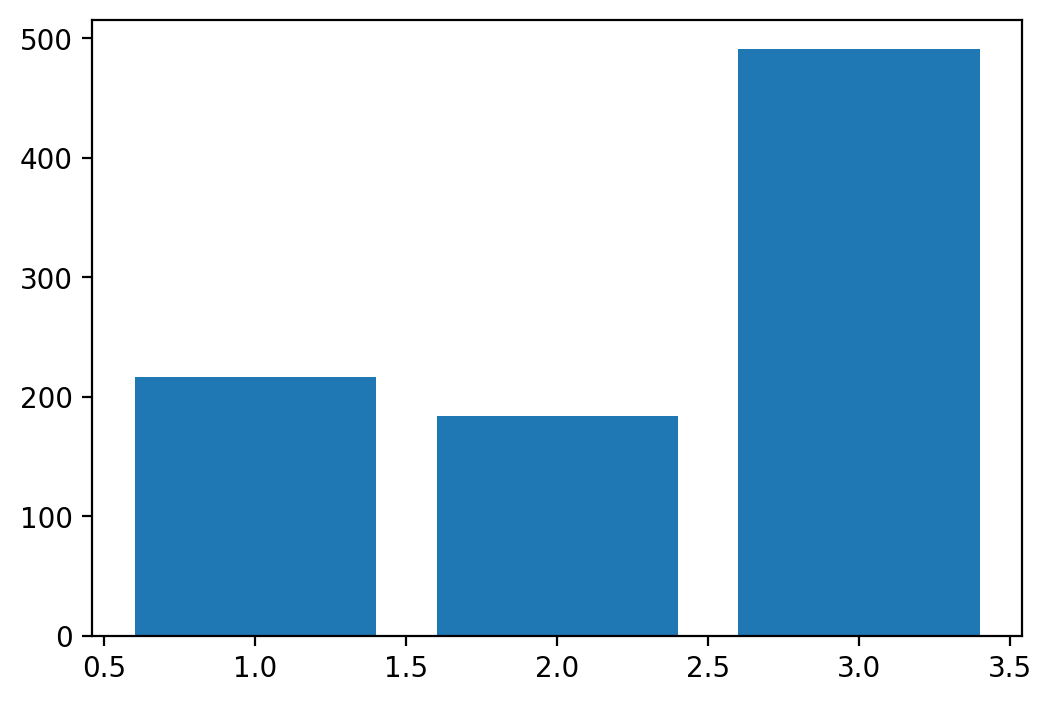

In [7]:
temp = titanic['Pclass'].value_counts()

plt.bar(x=temp.index, height=temp.values)
plt.show()

- **Seaborn**의 **countplot()** 함수를 사용하면 집계 과정 없이도 Bar Plot을 그릴 수 있습니다.

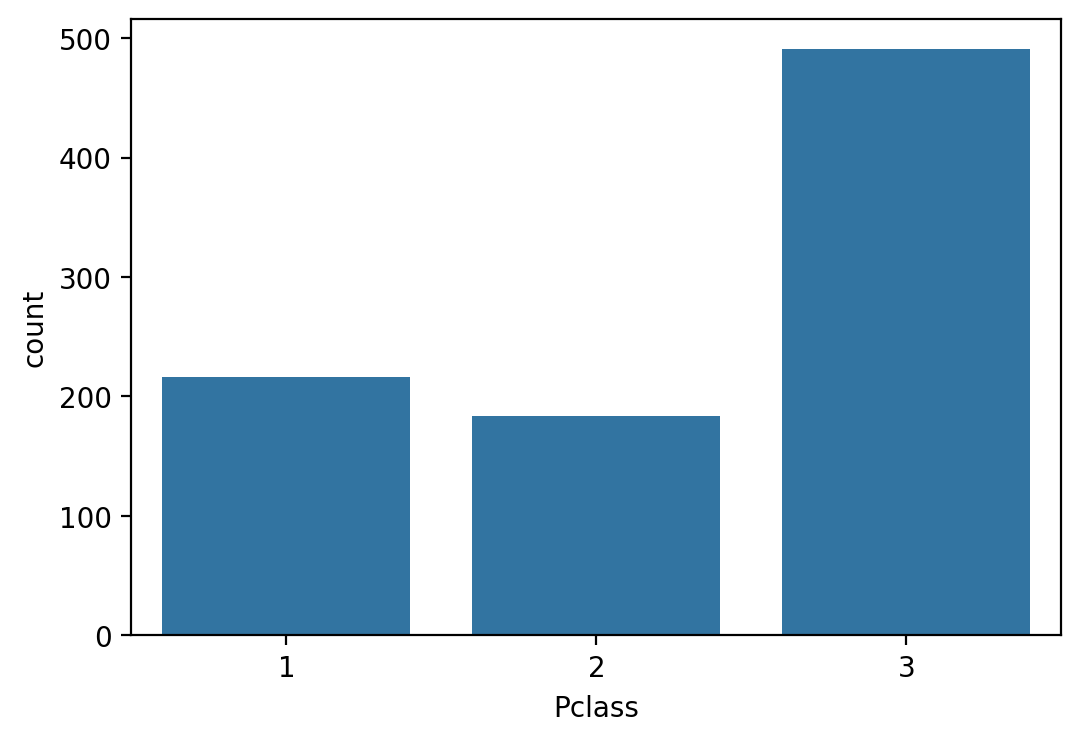

In [8]:
sns.countplot(x='Pclass', data=titanic)
plt.show()

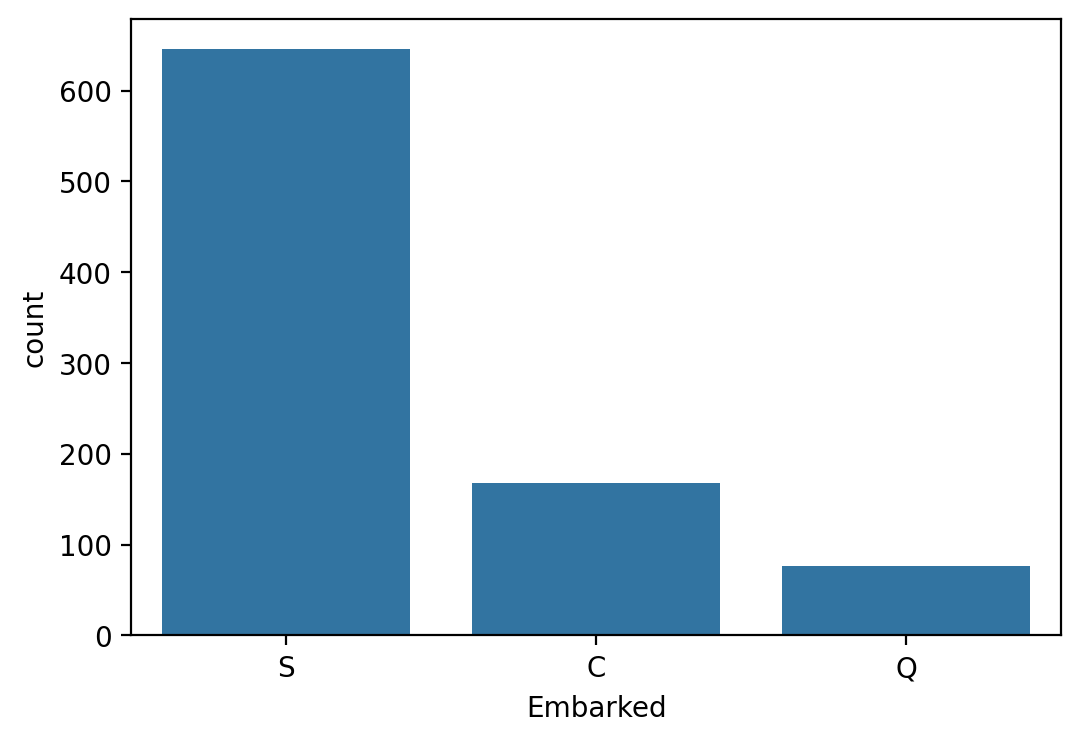

In [9]:
sns.countplot(x='Embarked', data=titanic)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

다음 변수들의 범줏값과 그 값들의 개수를 Seaborn의 countplot() 함수로 시각화해서 확인하세요.

**1️⃣ Title**

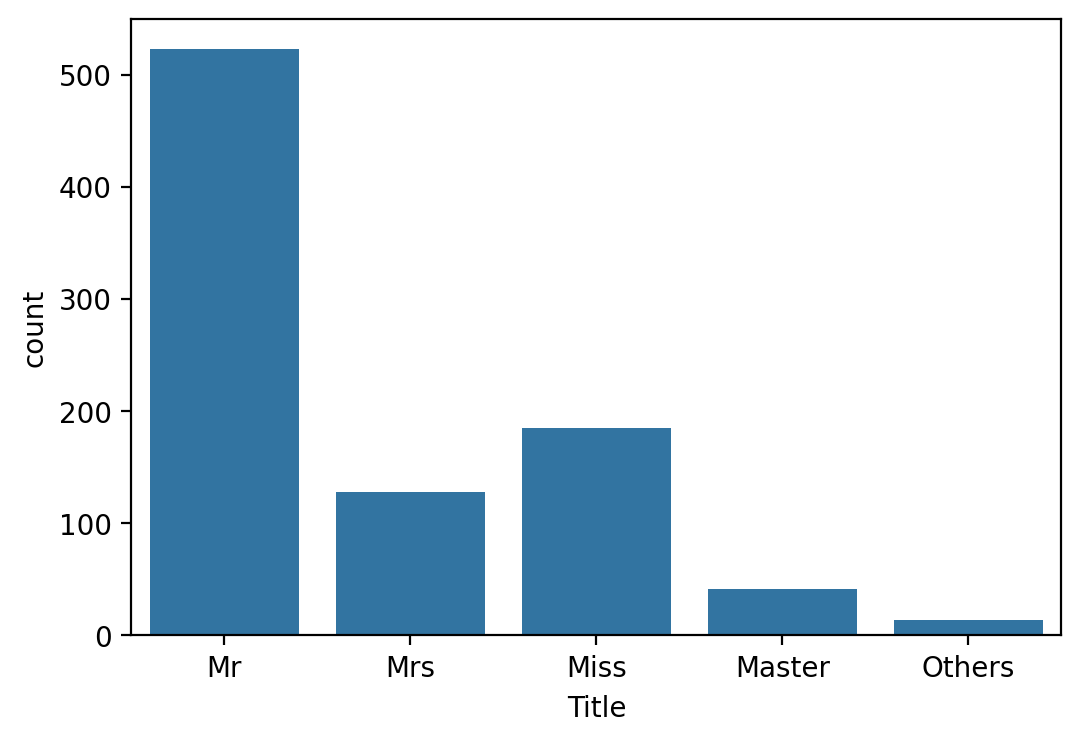

In [25]:
sns.countplot(x='Title', data=titanic)
plt.show()

**2️⃣ Sex**

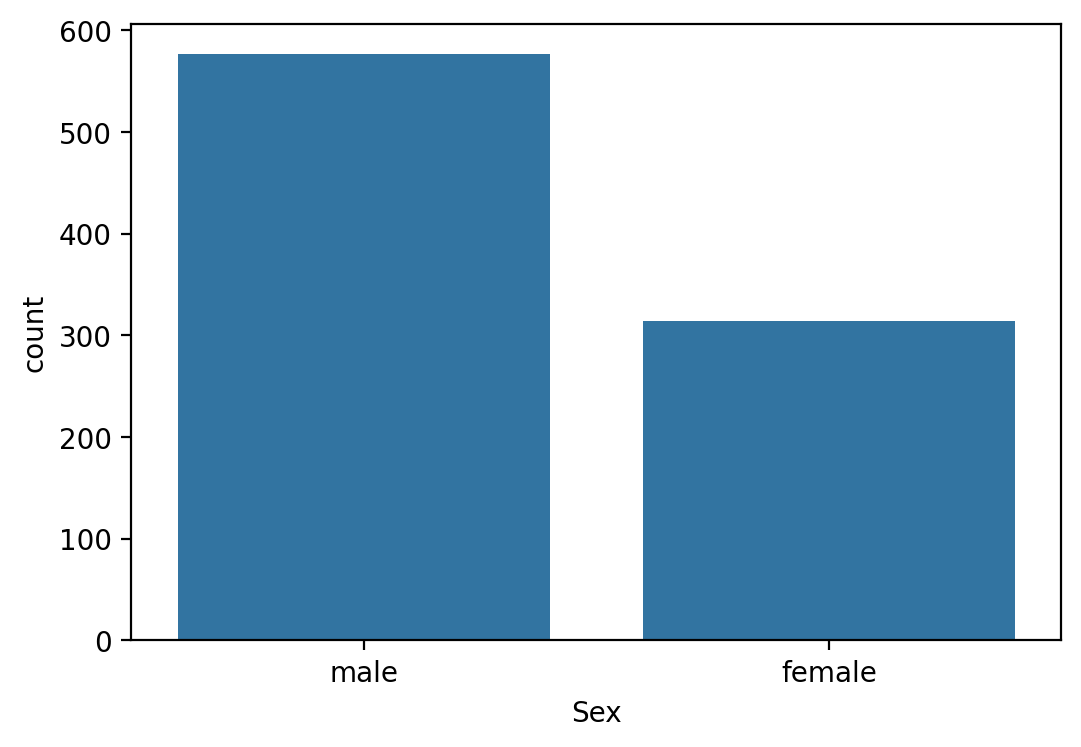

In [26]:
sns.countplot(x='Sex', data=titanic)
plt.show()

**3️⃣ AgeGroup**

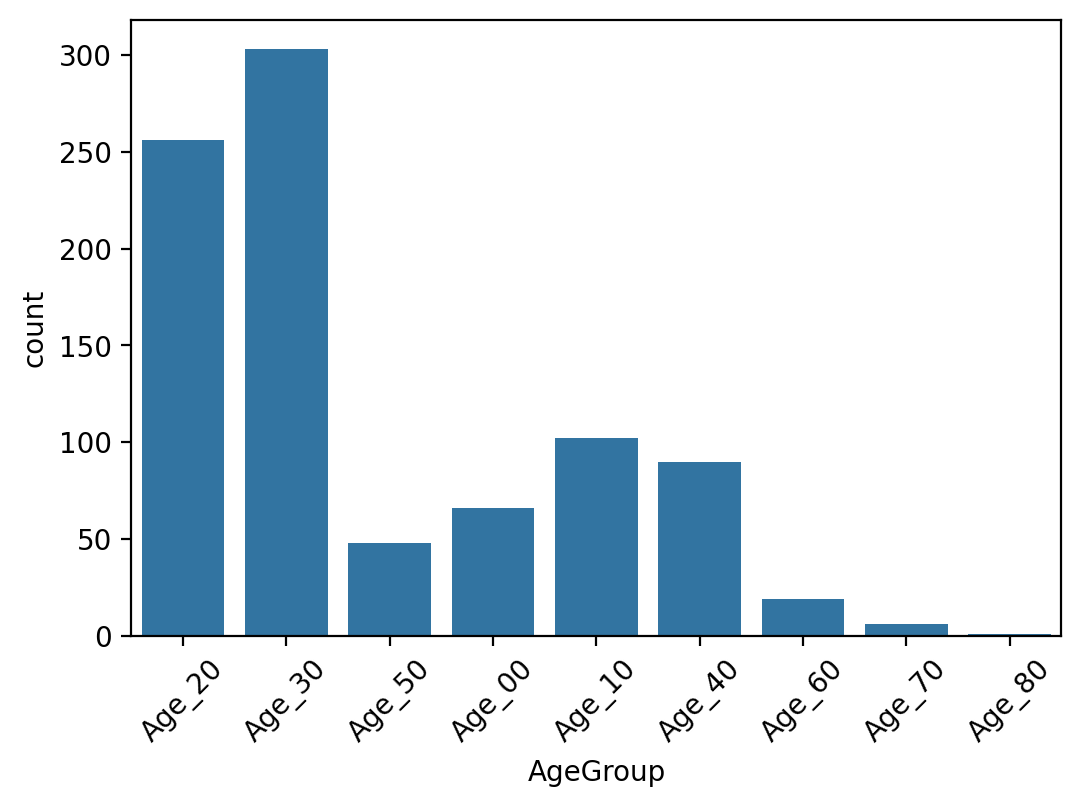

In [28]:
sns.countplot(x='AgeGroup', data=titanic)
plt.xticks(rotation=45)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **3.2. Pie Chart**

- 범주별 값의 빈도수가 아닌 비율을 비교할 때는 Pie Chart를 사용합니다.
- Pie Chart 역시 집계를 먼저 해야 합니다.

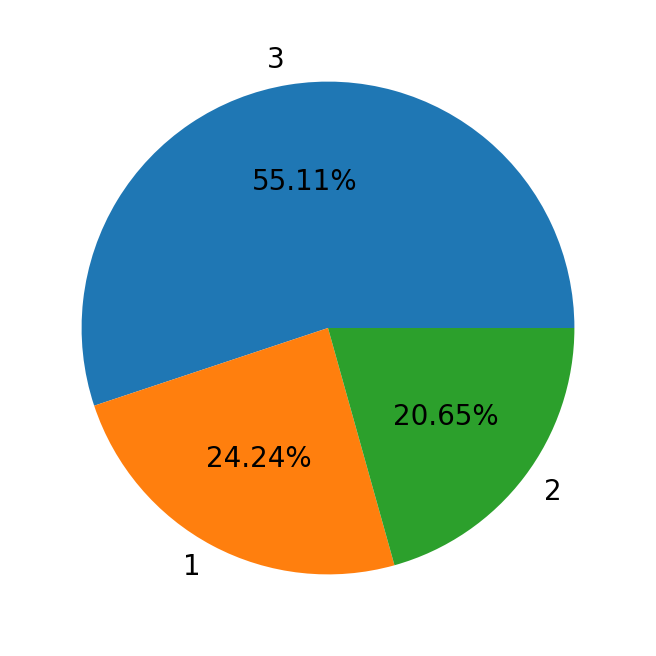

In [10]:
temp = titanic['Pclass'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%')
plt.show()

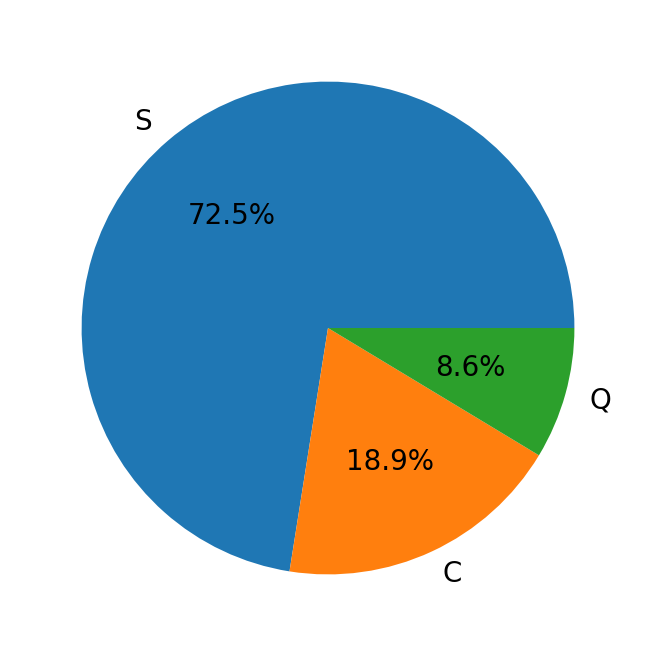

In [11]:
temp = titanic['Embarked'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.1f%%')
plt.show()

- 다음 두 옵션을 사용해 파이의 각도와 방향을 조절해 봅니다.
    
    - startangle=90: 90도 부터 시작
    - counterclock=False: 시계 방향으로

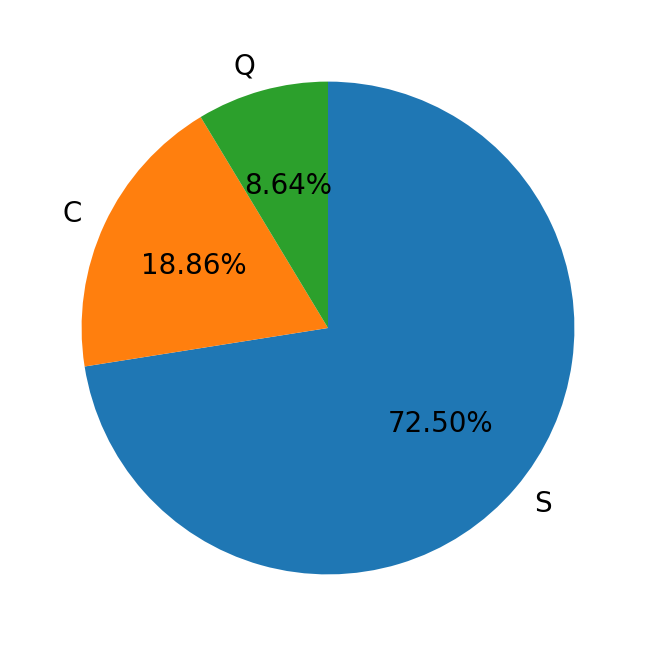

In [12]:
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)
plt.show()

- 다음 두 옵션을 사용해 파이 간격과 그림자를 조절해 봅니다.

    - explode=[0.05, 0.05, 0.05]: 중심으로 부터 1, 2, 3을 얼마만큼 띄울지
    - shadow=True: 그림자 추가



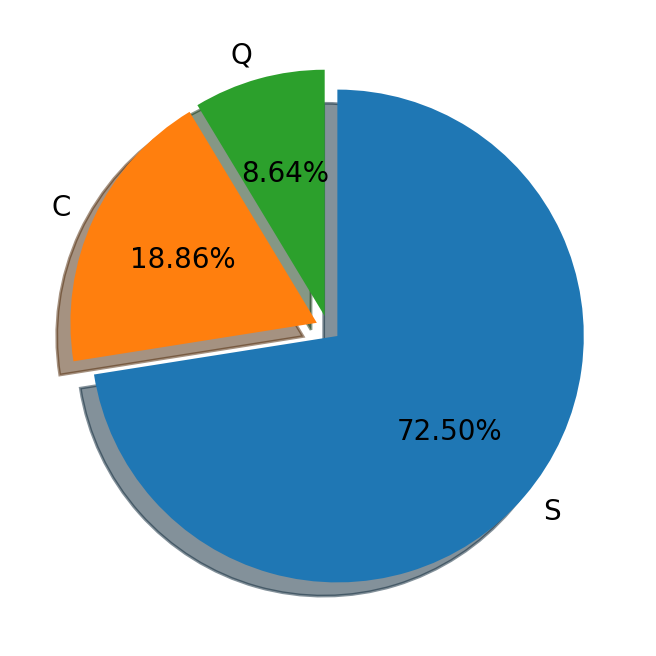

In [13]:
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False,
        explode=[0.05, 0.05, 0.05],
        shadow=True)
plt.show()

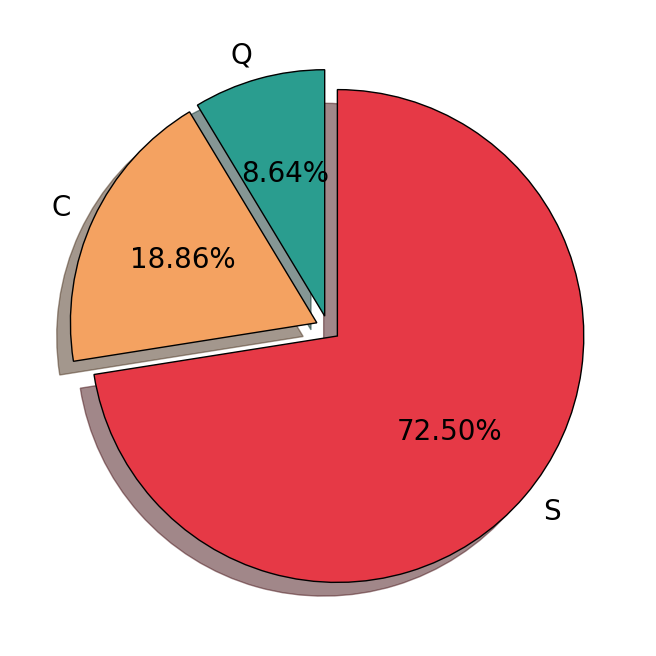

In [30]:
colors = sns.color_palette("bright")
colors = sns.color_palette("pastel")
colors = sns.color_palette("deep")
colors = ["#E63946", "#F4A261", "#2A9D8F", "#264653"]
plt.pie(x=temp.values,
       labels=temp.index,
       autopct='%.2f%%',
       startangle=90,
       counterclock=False,
       explode=[0.05, 0.05, 0.05],
       shadow=True,
       wedgeprops={'edgecolor': 'black', 'linewidth':0.5},
       colors=colors)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

다음 변수들의 범줏값과 그 값들의 비율을 Matplotlib의 pie() 함수로 시각화해서 확인하세요.

**1️⃣ Title**

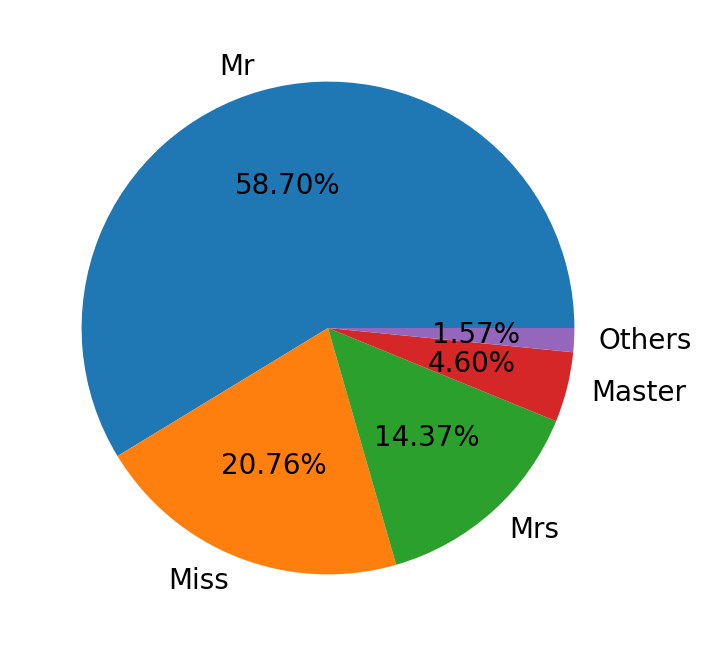

In [31]:
temp = titanic['Title'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%')
plt.show()

**2️⃣ Sex**

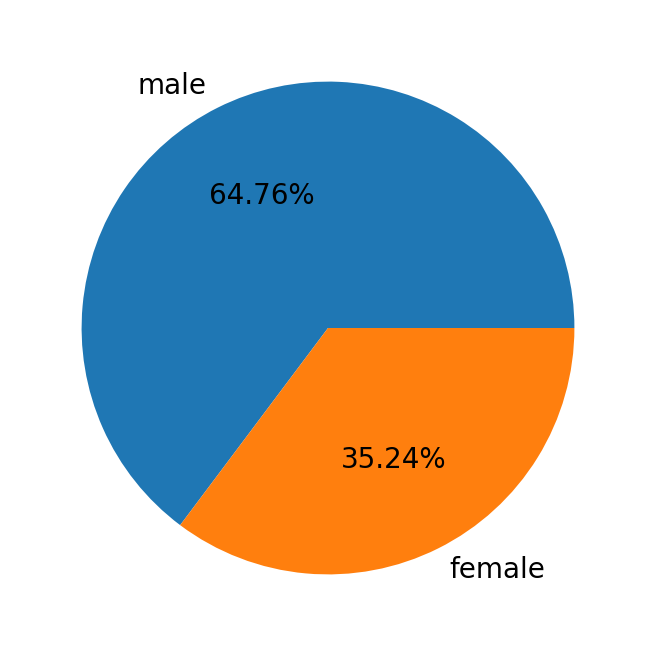

In [32]:
temp = titanic['Sex'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>